In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
sns.set()

<h3> Задача №7.1

<h4> Пункт а)

In [2]:
#n - size of samples N(a_i, (sigm_i)^2 ) 
#a - tuple of mean values
#g - tuple of sigm
#acc - accuracy
def pearson_norm(n, acc, a=(0, 0), g=(1, 1)):
    coeffs = list()
    for i in range(acc):
        x = stats.norm.rvs(loc=a[0], scale=g[0], size=n)
        y = stats.norm.rvs(loc=a[1], scale=g[1], size=n)
        coeffs.append(stats.pearsonr(x, y)[0])
    return np.array(coeffs)

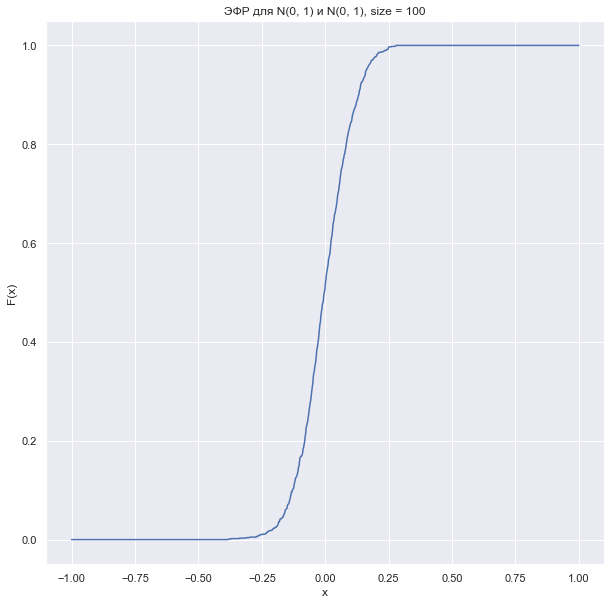

In [3]:
acc = 1000
n = 100
a = (0, 0)
g = (1, 1)
fig, ax = plt.subplots(figsize=(10, 10))

domain = np.linspace(-1, 1, acc)
norm = pearson_norm(n, acc, a, g)

ax.plot(domain, [norm[norm <= domain[i]].size / norm.size for i in range(acc)])
ax.set_title('ЭФР для N({}, {}) и N({}, {}), size = {}'.format(a[0], g[0], a[1], g[1], n))
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.show()

<h4> Пункт б)

In [4]:
#n - sample size
#norm - tuple for N(a, g^2) params
#a - param for exp(1/a)
#acc - accuracy
def norm_expon(n, acc, norm=(0, 1), a=1):
    coeffs = list()
    for i in range(acc):
        x = stats.norm.rvs(loc=norm[0], scale=norm[1], size=n)
        y = stats.expon.rvs(loc=0, scale=1/a, size=n)
        coeffs.append(stats.pearsonr(x, y)[0])
    return np.array(coeffs)

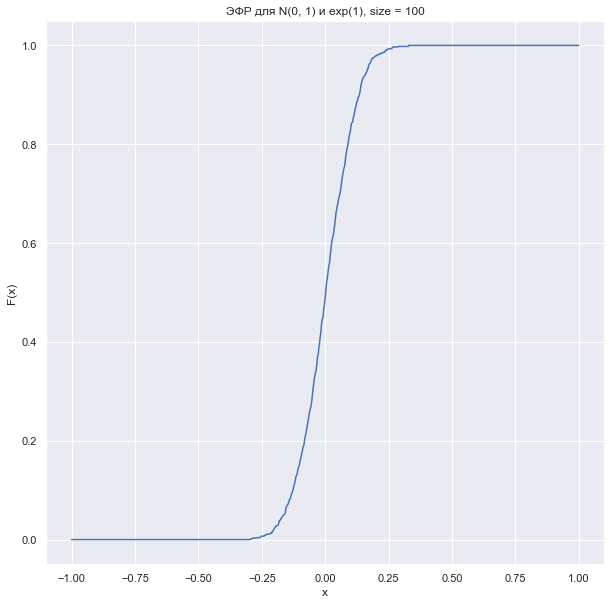

In [5]:
acc = 1000
n = 100
norm = (0, 1)
a = 1
fig, ax = plt.subplots(figsize=(10, 10))

domain = np.linspace(-1, 1, acc)
norm_exp = norm_expon(n, acc, norm, a)

ax.plot(domain, [norm_exp[norm_exp <= domain[i]].size / norm_exp.size for i in range(acc)])
ax.set_title('ЭФР для N({}, {}) и exp({}), size = {}'.format(norm[0], norm[1], a, n))
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.show()

<h4> Пункт в)

In [6]:
#n - sample size
#r1 - tuple for R[a1, b1] params
#r2 - tuple for R[a2, b2] params
#acc - accuracy
def uniforms(n, acc, r1=(0, 1), r2=(0, 1)):
    coeffs = list()
    for i in range(acc):
        x = stats.uniform.rvs(loc=r1[0], scale=r1[1]-r1[0], size=n)
        y = stats.uniform.rvs(loc=r2[0], scale=r2[1]-r2[0], size=n)
        coeffs.append(stats.pearsonr(x, y)[0])
    return np.array(coeffs)

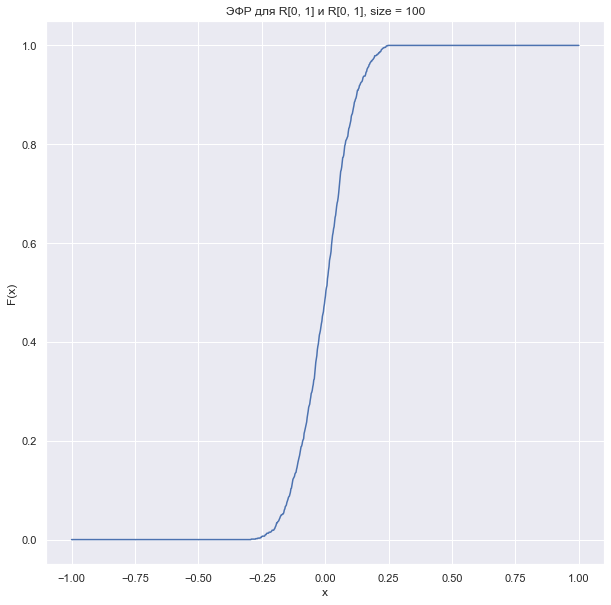

In [7]:
acc = 1000
n = 100
r1 = (0, 1)
r2 = (0, 1)
fig, ax = plt.subplots(figsize=(10, 10))

domain = np.linspace(-1, 1, acc)
uni = uniforms(n, acc, r1, r2)

ax.plot(domain, [uni[uni <= domain[i]].size / uni.size for i in range(acc)])
ax.set_title('ЭФР для R[{}, {}] и R[{}, {}], size = {}'.format(r1[0], r1[1], r2[0], r2[1], n))
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.show()

<h4> Вместе

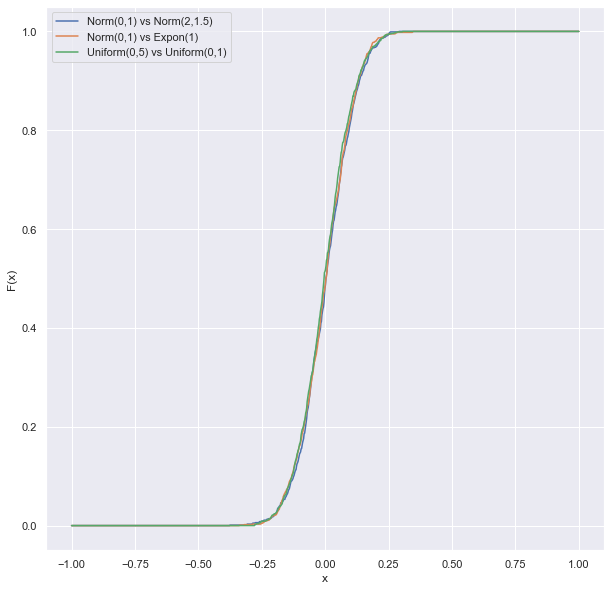

In [13]:
acc = 1000
n = 100
r1 = (0, 5)
r2 = (0, 1)
a_norm = (0, 2)
g = (1, 1.5)
norm_p = (0, 1)
a = 1
fig, ax = plt.subplots(figsize=(10, 10))

domain = np.linspace(-1, 1, acc)

norm = pearson_norm(n, acc, a_norm, g)
norm_exp = norm_expon(n, acc, norm_p, a)
uni = uniforms(n, acc, r1, r2)

ax.plot(domain, [norm[norm <= domain[i]].size / norm.size for i in range(acc)], 
        label='Norm({},{}) vs Norm({},{})'.format(a_norm[0], g[0], a_norm[1], g[1]))
ax.plot(domain, [norm_exp[norm_exp <= domain[i]].size / norm_exp.size for i in range(acc)], 
        label='Norm({},{}) vs Expon({})'.format(norm_p[0], norm_p[1], a))
ax.plot(domain, [uni[uni <= domain[i]].size / uni.size for i in range(acc)],
        label='Uniform({},{}) vs Uniform({},{})'.format(r1[0], r1[1], r2[0], r2[1]))
ax.set_xlabel('x')
ax.legend()
ax.set_ylabel('F(x)')
plt.show()